In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
counties = gpd.read_file('datasets/county shapefile/cb_2018_us_county_500k.shp')

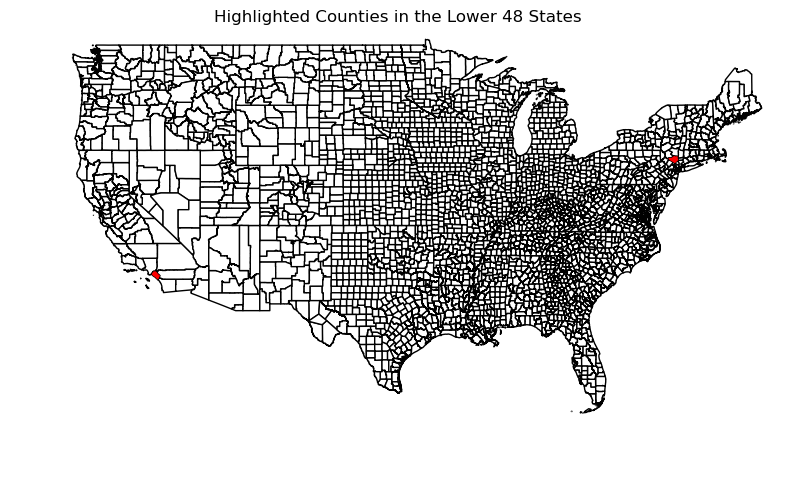

In [7]:
# Highlight specific counties by setting a condition
# For example, let's say we want to highlight counties with names 'Orange' in California and New York
highlight = counties[(counties['NAME'] == 'Orange') & (counties['STATEFP'].isin(['06', '36']))]

# Plot all counties
base = counties.plot(color='white', edgecolor='black', figsize=(10, 10))

# Plot highlighted counties on top with a different color
highlight.plot(ax=base, color='red')

# Set x and y limits to focus on the lower 48 states
# These are approximate and can be adjusted as needed for better fit
plt.xlim(-130, -65)
plt.ylim(20, 50)

# Remove the axes
base.axis('off')

# Optionally, set a title
plt.title('Highlighted Counties in the Lower 48 States')

# Show plot
plt.show()

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('clustered_data.csv')

In [12]:
df = pd.merge(df[['State', 'CountyName', 'km4cluster_y']], pd.read_csv('datasets/geocodes.csv'),
             left_on=['CountyName', 'State'], right_on=['area', 'state abbv'])
df

,State,CountyName,km4cluster_y,Unnamed: 0,state code,county code,area,state abbv
0,ID,Ada County,3,3730,16,1,Ada County,ID
1,CO,Adams County,1,1936,8,1,Adams County,CO
2,NY,Albany County,0,23881,36,1,Albany County,NY
3,PA,Allegheny County,0,31905,42,3,Allegheny County,PA
4,MD,Anne Arundel County,0,13212,24,3,Anne Arundel County,MD
...,...,...,...,...,...,...,...,...
133,MN,Washington County,0,16053,27,163,Washington County,MN
134,OR,Washington County,1,31660,41,67,Washington County,OR
135,MI,Wayne County,0,13896,26,163,Wayne County,MI
136,UT,Weber County,3,39510,49,57,Weber County,UT


In [11]:
counties.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   State         138 non-null    object
 1   CountyName    138 non-null    object
 2   km4cluster_y  138 non-null    int64 
 3   Unnamed: 0    138 non-null    int64 
 4   state code    138 non-null    int64 
 5   county code   138 non-null    int64 
 6   area          138 non-null    object
 7   state abbv    138 non-null    object
dtypes: int64(4), object(4)
memory usage: 8.8+ KB


In [16]:
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."


In [33]:
df['state code'] = df['state code'].astype(str).str.zfill(2)
df['county code'] = df['county code'].astype(str).str.zfill(3)
df = df[(df['km4cluster_y']==3)|(df['km4cluster_y']==2)]

In [34]:
merged = counties.merge(df, left_on=['COUNTYFP', 'STATEFP'], right_on=['county code', 'state code'], how='left')
merged

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,State,CountyName,km4cluster_y,Unnamed: 0,state code,county code,area,state abbv
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,31,073,00835858,0500000US31073,31073,Gosper,06,1186616237,11831826,"POLYGON ((-100.09510 40.43866, -100.08937 40.4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3229,39,075,01074050,0500000US39075,39075,Holmes,06,1094405866,3695230,"POLYGON ((-82.22066 40.66758, -82.19327 40.667...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3230,48,171,01383871,0500000US48171,48171,Gillespie,06,2740719114,9012764,"POLYGON ((-99.30400 30.49983, -99.28234 30.499...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3231,55,079,01581100,0500000US55079,55079,Milwaukee,06,625440563,2455383635,"POLYGON ((-88.06959 42.86726, -88.06959 42.872...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
from matplotlib.colors import ListedColormap

custom_colors = ['#d62728', '#2ca02c']
custom_cmap = ListedColormap(custom_colors)

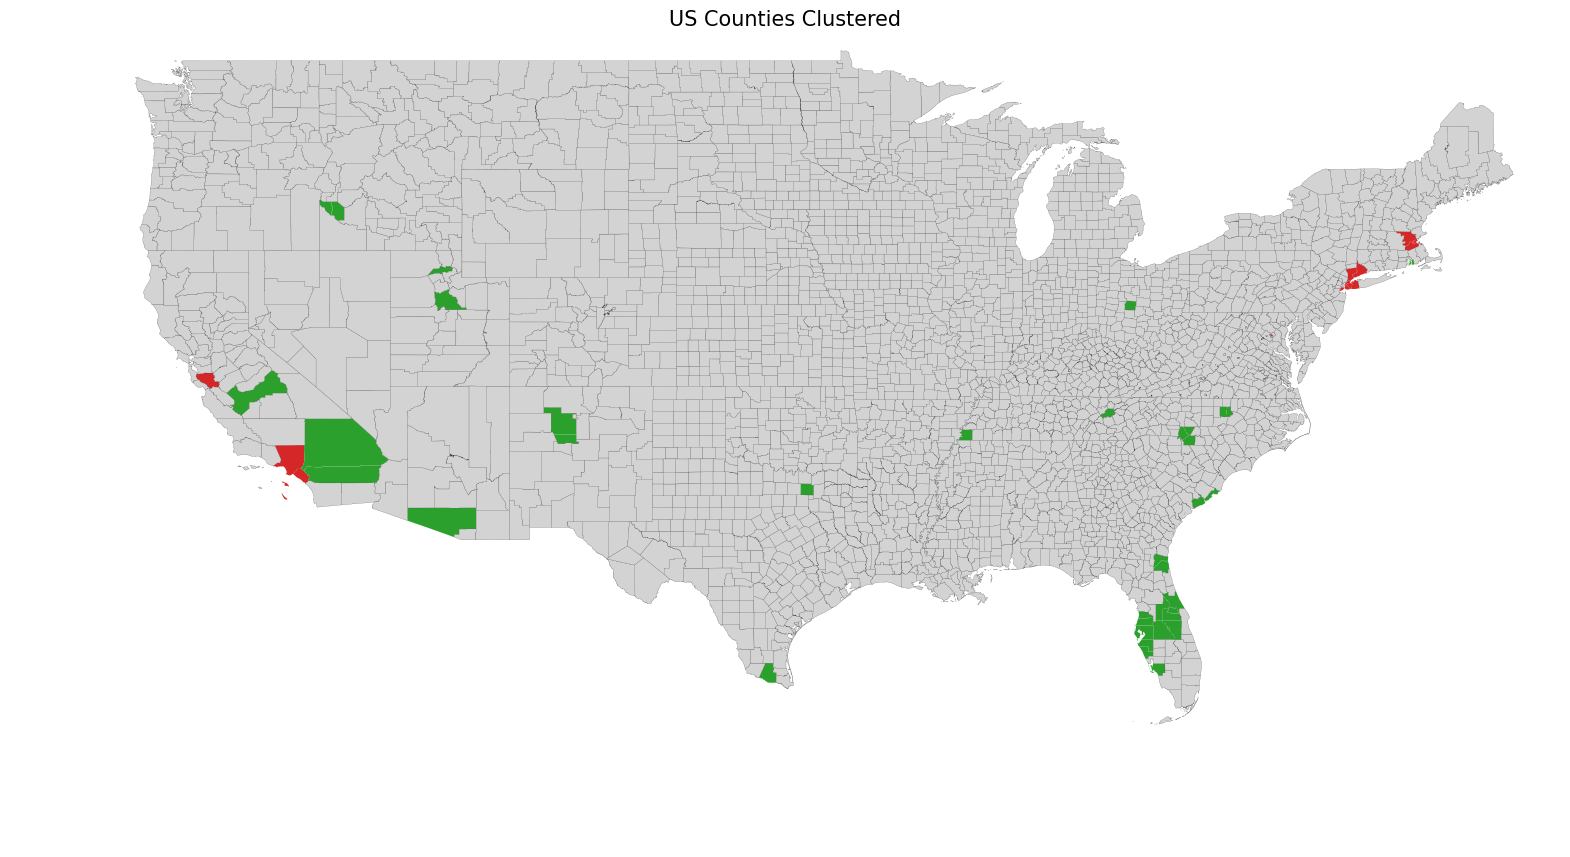

In [38]:
# Highlight specific counties by setting a condition

fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# Use the 'Cluster' column to color the counties, adjust 'cmap' for different color schemes
merged.plot(column='km4cluster_y', ax=ax, legend=False, cmap=custom_cmap, categorical=True, missing_kwds={
    "color": "lightgrey",  # Color for counties with no data
    "edgecolor": "black",
    "linewidth": 0.1,
    "label": "Not clustered",
})

# Focus on the lower 48 states by adjusting the limits
ax.set_xlim(-130, -65)
ax.set_ylim(20, 50)

# Remove axis
ax.axis('off')

# Optionally, add a title
ax.set_title('US Counties Clustered', fontsize=15)

plt.show()